# Part 0 - K Means Clustering 1 

Problem 1:

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [106]:
df = pd.read_csv("glass_unlabelled.csv")
df1 = pd.read_csv("glass_labelled.csv")

In [107]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [108]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [124]:
df.shape

(214, 9)

In [110]:
df1.shape

(214, 10)

Problem 2:

In [111]:
new_df = df.drop(["RI"], axis = 1)

Problem 2a, 2b, 2c:

In [112]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,12):
    km = KMeans(n_clusters = k)
    km.fit(new_df) 
    wcss.append(km.inertia_)

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


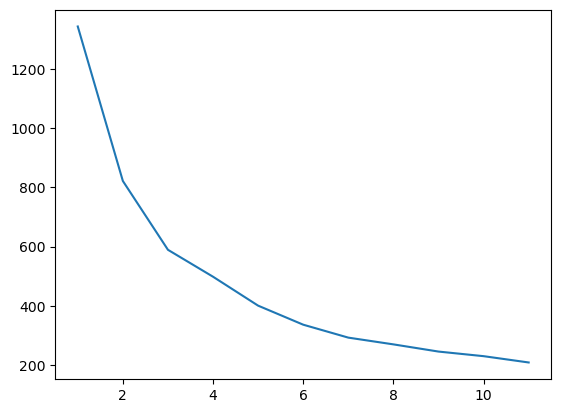

In [113]:
plt.plot(range(1,12), wcss)

I believe the ideal number of clusters would be 4 and there looks to be a significant decrease in the plot.  

In [114]:
km = KMeans(n_clusters = 4)
km.fit(new_df)

KMeans(n_clusters=4)

In [115]:
km.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [116]:
df1["pred_labels"] = km.labels_

In [117]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


Problem 3, 3a, 3b: 

My prediction number of clusters was 4, but the actual number of clusters was 6. 

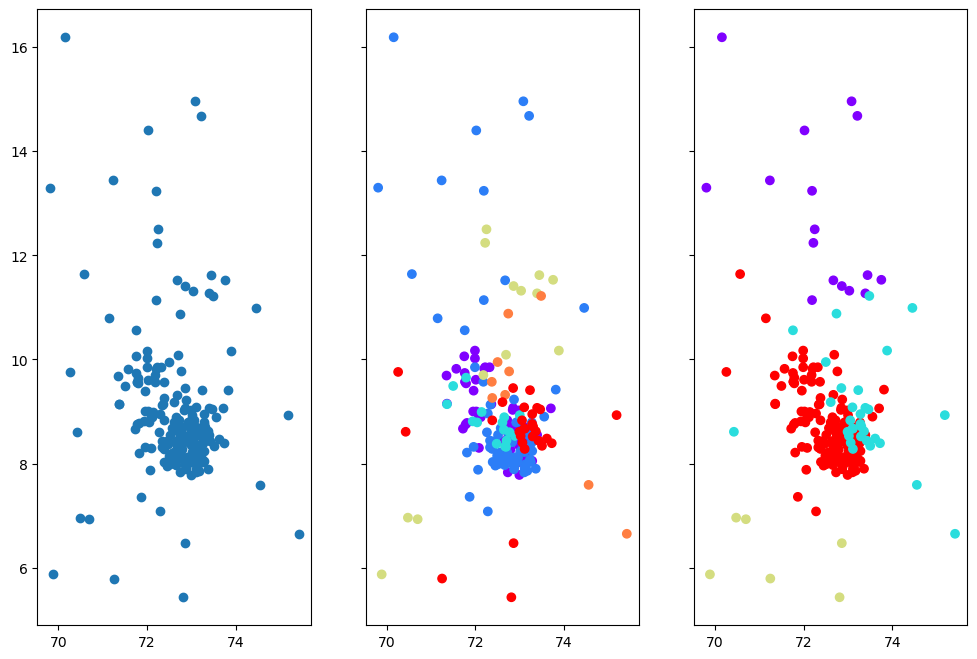

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (12,8))

ax1.scatter(x = df1["Si"], y = df1["Ca"])

ax2.scatter(x = df1["Si"], y = df1["Ca"], c = df1["Type"], cmap = "rainbow")

ax3.scatter(x = df1["Si"], y = df1["Ca"], c = df1["pred_labels"], cmap = "rainbow")

# Part 1 - Exploratory Data Analysis

Problem 1:

C:\Users\ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

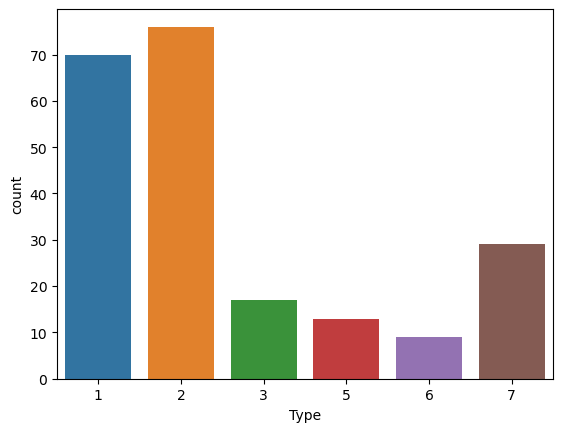

In [119]:
sns.countplot(df1["Type"])

The distribution is distributed unevenly, it shows that Types 1 and 2 have an increased number of measurements than the other types. The data is imbalanced.

Problem 2a:

<AxesSubplot:>

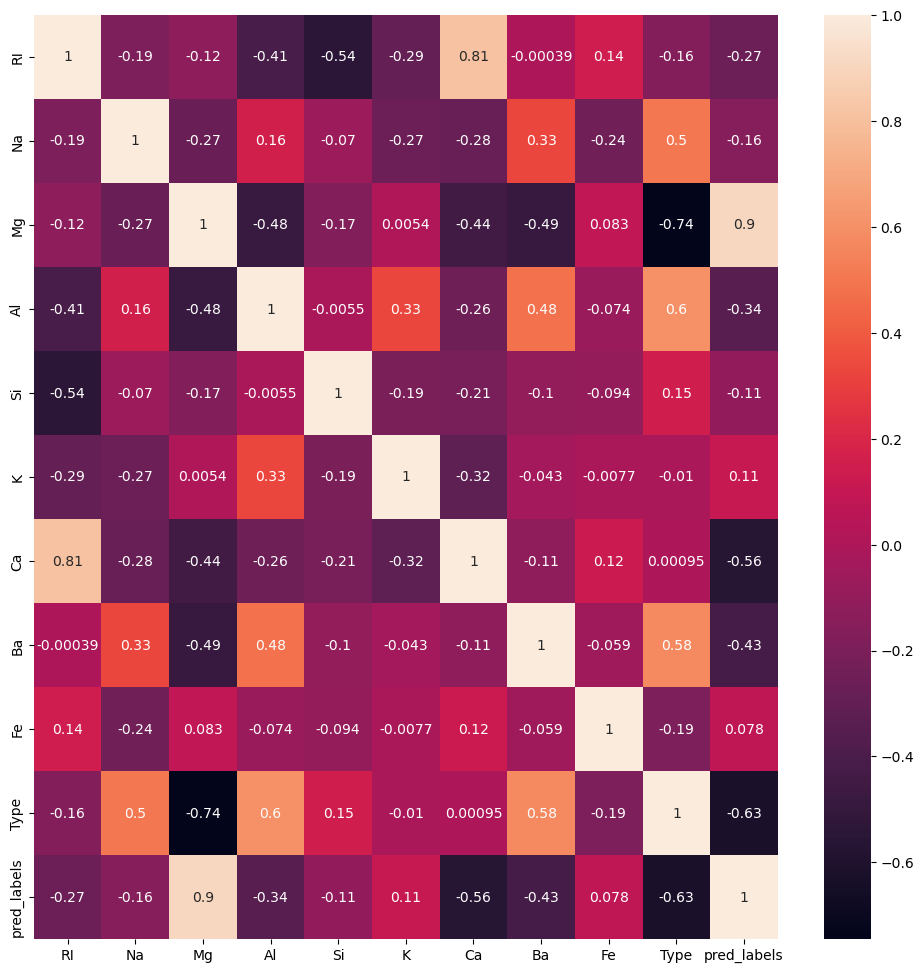

In [122]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

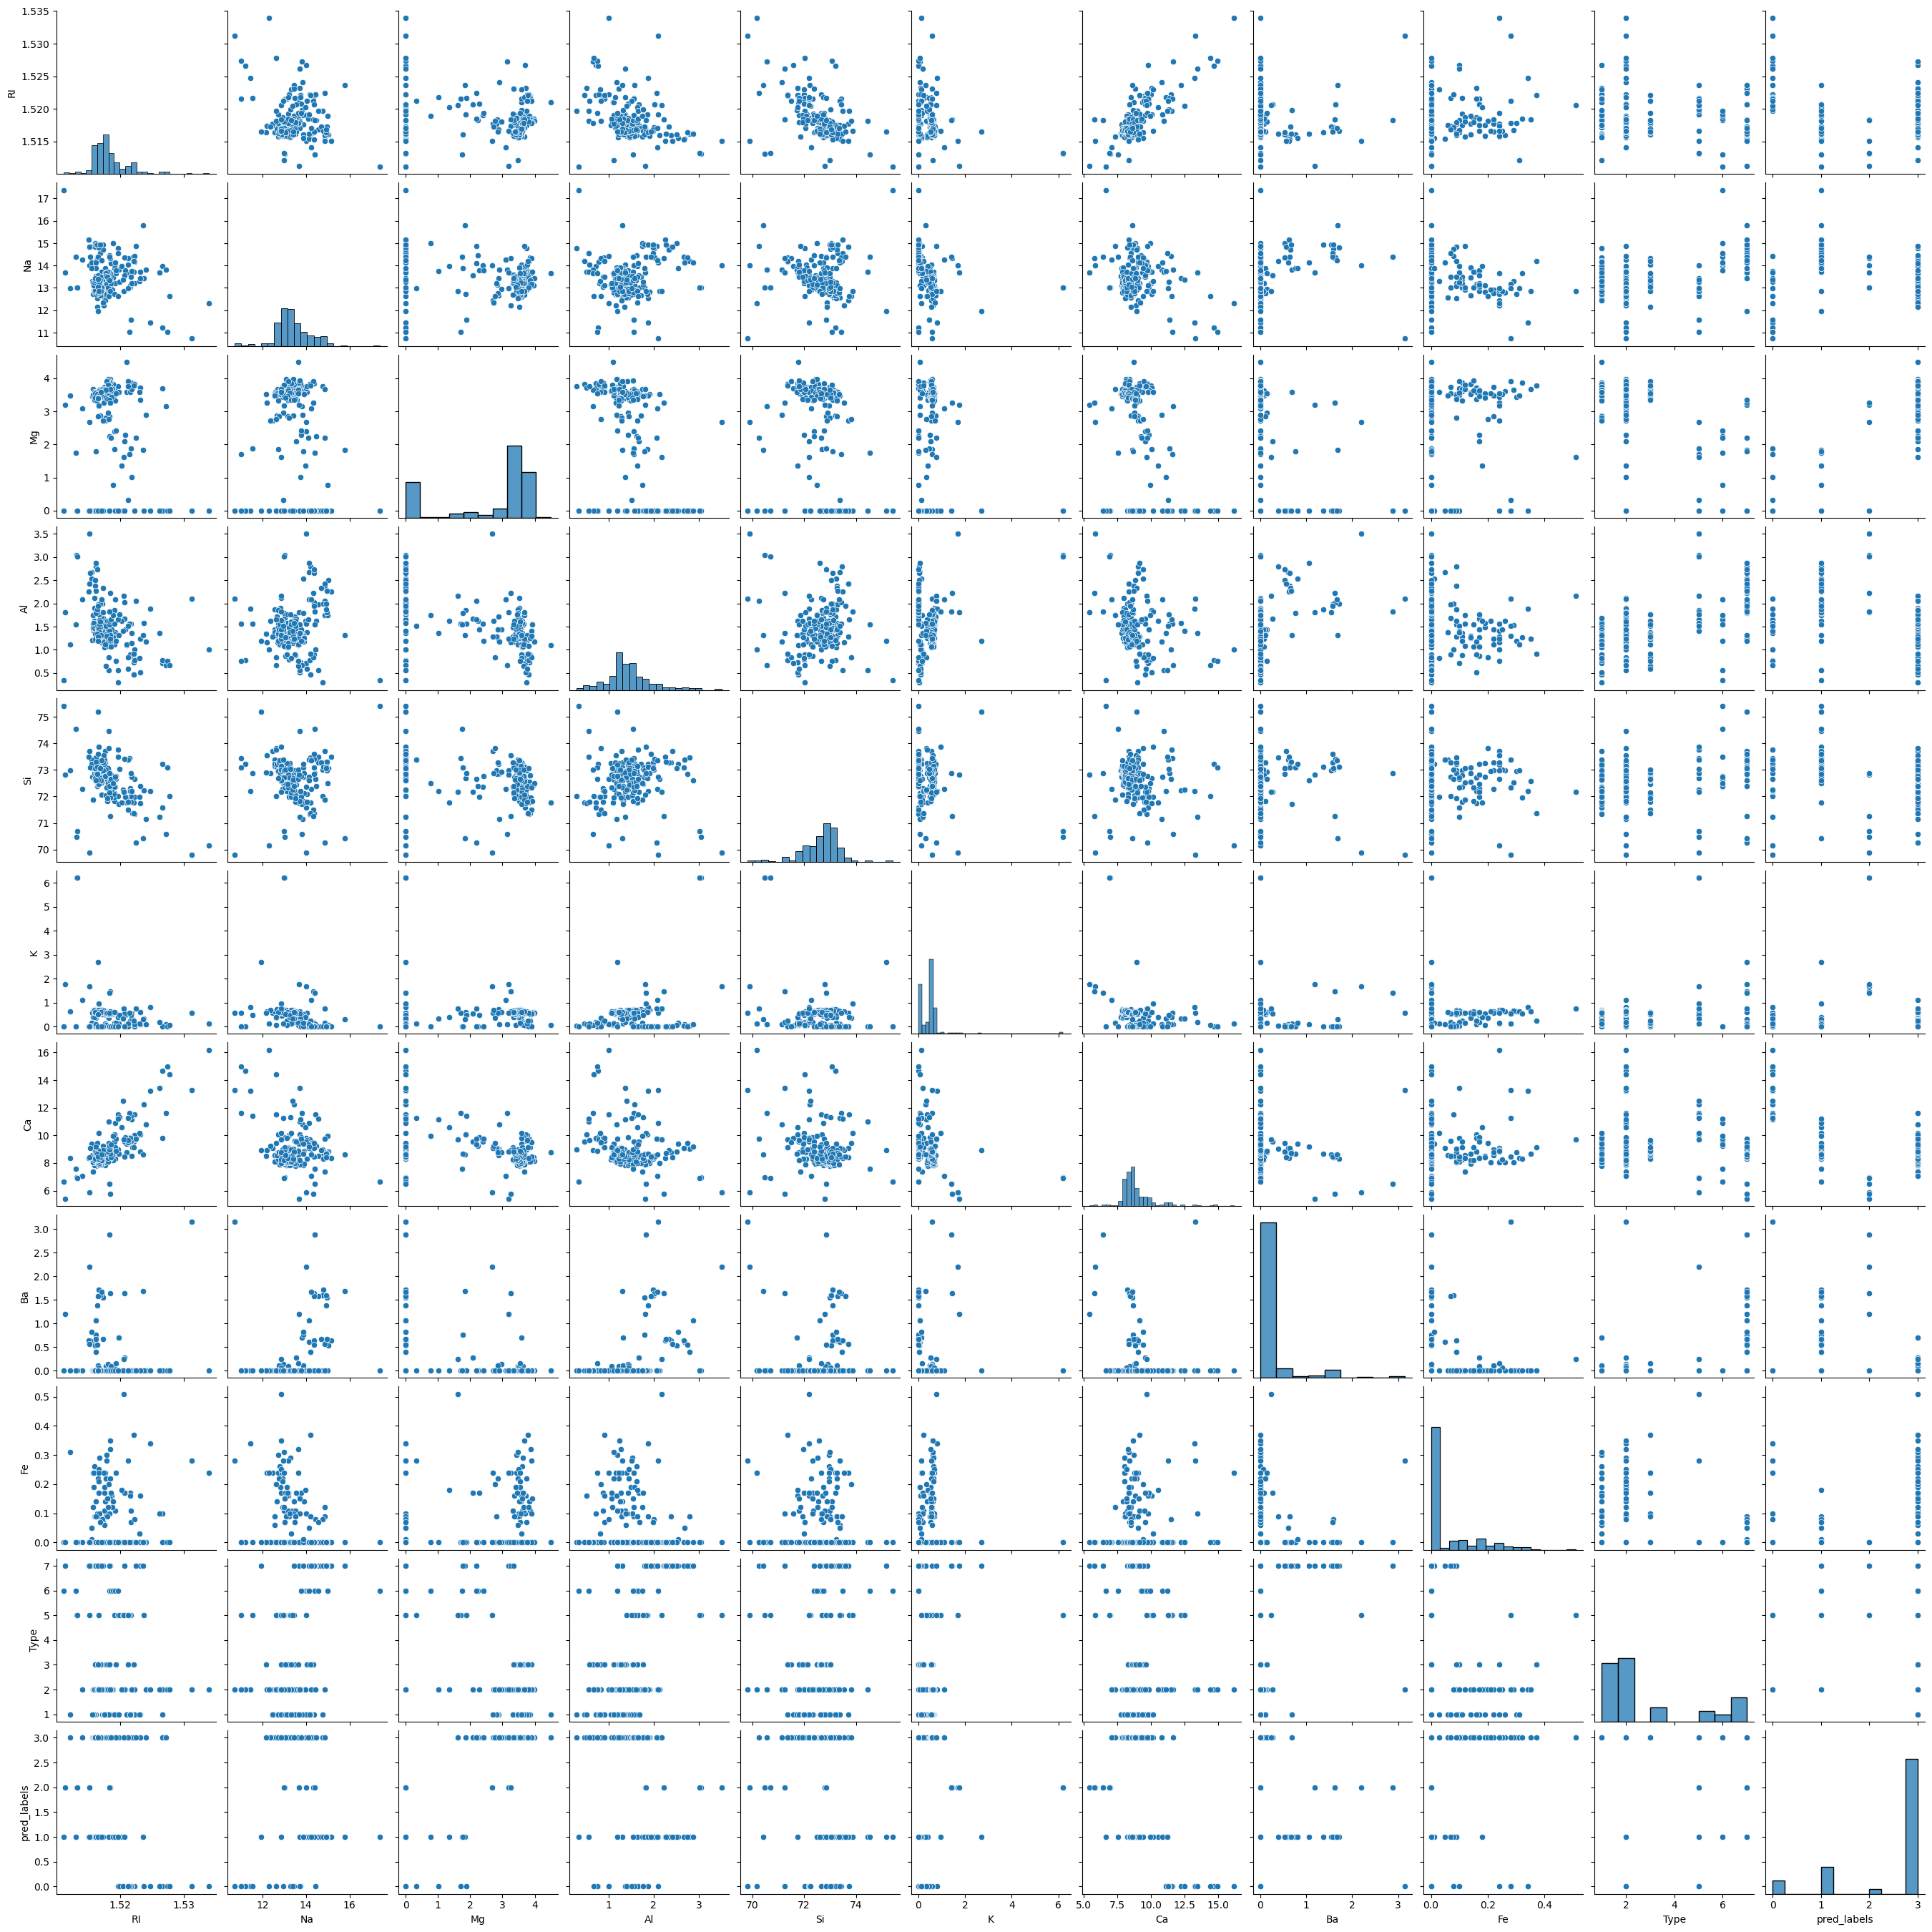

In [123]:
sns.pairplot(df1)
plt.show

<AxesSubplot:>

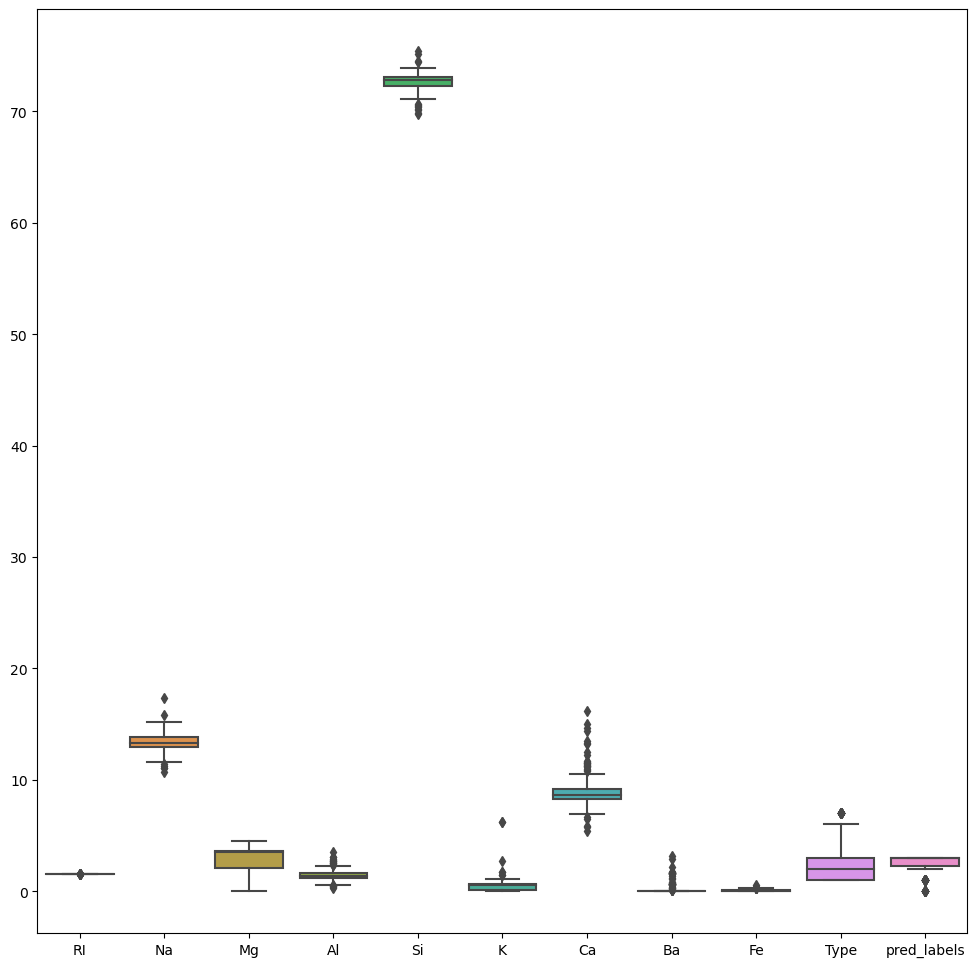

In [126]:
plt.figure(figsize=(12,12))
sns.boxplot(data = df1)

I notice in the heatmap there is a high correlation of Mg with the pred labels and that there is a second highest correlation of 0.81 between RI and Ca. There are also other types that have a few correlations above 0.5 with certain elements. 

I notice in the pairplot that there are vrious amounts of plots that have a numerous amount of data values that are 0. Most of the plots seen, seem to have no correlation or very little positive/negative correlation. 

I notice in the box plot that a few elements are similar and the one with the greatest value is Si. 

Problem 2b:

In [127]:
df2 = df1.drop(["RI"], axis = 1)

In [128]:
df2.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred_labels
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,3
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,3
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,3
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,3
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,3


It is likely to drop the refractive index because it has no effect to the types of glasses or the predictions that we are aiming to do. 

# Part 2 - Baseline Models

Problem 1:

In [131]:
x = df2.drop(["Type"], axis = 1)
y = df2["Type"]

Problem 2:

Problem 2a:

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_params = {
    "kernel":["rbf", "poly", "sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1],
    "degree": [1,2,3]
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.6507482993197279
{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, degree=1, gamma=0.01)


Problem 2b:

In [137]:
svc = SVC(C=100, gamma='scale', kernel='rbf')
svc.fit(x_train_scaled, y_train)

print(svc.score(x_train_scaled, y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_svc))
print(metrics.confusion_matrix(y_pred_svc, y_test))
print(metrics.classification_report(y_pred_svc, y_test))

0.8859060402684564
0.7230769230769231
[[17  6  0  0  0  0]
 [ 5 17  1  1  1  1]
 [ 1  0  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.74      0.74      0.74        23
           2       0.68      0.65      0.67        26
           3       0.50      0.50      0.50         2
           5       0.67      0.50      0.57         4
           6       0.75      1.00      0.86         3
           7       0.88      1.00      0.93         7

    accuracy                           0.72        65
   macro avg       0.70      0.73      0.71        65
weighted avg       0.72      0.72      0.72        65



The model score is 0.885 and the accuracy is 0.72. The accuracy could definitely be a lot better.
The types that are being misclassified are types 1 and 2. 

Problem 3, 3a, 3b:

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_params = {
    "n_estimators":[100, 150, 200, 250, 300, 350, 400],
    "max_features":['sqrt', 'log2'],
    "max_depth": [4,6,8,10,12],

}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.6974149659863945
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 250}
RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=250)


In [143]:
rf = RandomForestClassifier(max_depth = 4, max_features = 'sqrt', n_estimators = 250)

rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

0.8187919463087249
0.676923076923077
[[15  8  0  0  0  0]
 [ 5 18  0  2  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  3  0  0  1  0]
 [ 0  1  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.75      0.65      0.70        23
           2       0.56      0.72      0.63        25
           3       0.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       1.00      0.25      0.40         4
           7       1.00      0.88      0.93         8

    accuracy                           0.68        65
   macro avg       0.65      0.58      0.57        65
weighted avg       0.69      0.68      0.66        65



C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model score was 0.819 and the accuracy score was 0.677. 

Problem 4, 4a, 4b:

In [145]:
from sklearn.neural_network import MLPClassifier

grid_params = {
    "activation":['logistic','relu'],
    "hidden_layer_sizes":[(10,),(20,),(20,20),(30,),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[5000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.6574149659863945
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'max_iter': 5000}
MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=5000)


In [154]:
mlp = MLPClassifier(activation = 'logistic', alpha = 0.0001, hidden_layer_sizes = (10,), max_iter = 5000)
mlp.fit(x_train_scaled, y_train)
print(mlp.score(x_train_scaled, y_train))

y_pred_mlp = mlp.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_mlp))
print(metrics.confusion_matrix(y_test, y_pred_mlp))
print(metrics.classification_report(y_test, y_pred_mlp))

0.8389261744966443
0.7230769230769231
[[18  4  1  0  0  0]
 [ 5 19  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  2  0  0  2  0]
 [ 0  1  0  1  0  6]]
              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.66      0.76      0.70        25
           3       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         4
           7       1.00      0.75      0.86         8

    accuracy                           0.72        65
   macro avg       0.66      0.58      0.60        65
weighted avg       0.74      0.72      0.72        65



The model score is 0.839 and the accuracy is 0.72. I didn't expect this, I expected the model score and accuracy to increase than the previous models. The classification report shows that type 3 was most misclassified  which shows to be 0 for precision and recall. 

# Part 3 - Fixing the Imbalance and Model Improvement

Problem 1:

Problem 2:

In [155]:
sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x, y)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bal, y_bal, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled1 = scaler.fit_transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)


Problem 3a:

In [157]:
from sklearn.svm import SVC

grid_params = {
    "kernel":["rbf", "poly", "sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1],
    "degree": [1,2,3]
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled1, y_train1)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8275142538059131
{'C': 1000, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, degree=1, gamma=0.1)


In [160]:
svc = SVC(C=10, degree=1, gamma=0.1)
svc.fit(x_train_scaled1, y_train1)

print(svc.score(x_train_scaled1, y_train1))

y_pred_svc = svc.predict(x_test_scaled1)
print(metrics.accuracy_score(y_test1, y_pred_svc))

print(metrics.confusion_matrix(y_pred_svc, y_test1))
print(metrics.classification_report(y_pred_svc, y_test1))

0.8746081504702194
0.7737226277372263
[[15  6  9  0  0  0]
 [ 0  9  0  0  0  2]
 [ 7  6 17  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  1  0  0 23  0]
 [ 0  0  0  0  0 29]]
              precision    recall  f1-score   support

           1       0.68      0.50      0.58        30
           2       0.41      0.82      0.55        11
           3       0.65      0.57      0.61        30
           5       1.00      1.00      1.00        13
           6       1.00      0.96      0.98        24
           7       0.94      1.00      0.97        29

    accuracy                           0.77       137
   macro avg       0.78      0.81      0.78       137
weighted avg       0.79      0.77      0.77       137



The model score is 0.874 and the accuracy is 0.77. The model score is slightly lower than before, but the accuracy has increased.  

Problem 3b:

In [162]:
grid_params = {
    "n_estimators":[100, 150, 200, 250, 300, 350, 400],
    "max_features":['sqrt', 'log2'],
    "max_depth": [4,6,8,10,12],

}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled1, y_train1)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8589607946864163
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features='log2')


In [163]:
rf = RandomForestClassifier(max_depth = 10, max_features = 'log2', n_estimators = 100)

rf.fit(x_train_scaled1, y_train1)

print(rf.score(x_train_scaled1, y_train1))

y_pred_rf = rf.predict(x_test_scaled1)
print(metrics.accuracy_score(y_test1, y_pred_rf))

cm = metrics.confusion_matrix(y_test1, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test1, y_pred_rf)
print(results)

1.0
0.8248175182481752
[[19  1  2  0  0  0]
 [ 5 12  3  1  1  0]
 [ 8  0 18  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 23  0]
 [ 0  2  0  1  0 28]]
              precision    recall  f1-score   support

           1       0.59      0.86      0.70        22
           2       0.80      0.55      0.65        22
           3       0.78      0.69      0.73        26
           5       0.87      1.00      0.93        13
           6       0.96      1.00      0.98        23
           7       1.00      0.90      0.95        31

    accuracy                           0.82       137
   macro avg       0.83      0.83      0.82       137
weighted avg       0.84      0.82      0.82       137



The model score increased to 1.0 and the accuracy increased to 0.82. This has been affected significantly and has produced the highest model score out of all the models.

Problem 3c:

In [164]:
grid_params = {
    "activation":['logistic','relu'],
    "hidden_layer_sizes":[(10,),(20,),(20,20),(30,),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[5000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled1, y_train1)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8087638864397814
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20, 20), 'max_iter': 5000}
MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 20), max_iter=5000)


In [165]:
mlp = MLPClassifier(activation = 'relu', alpha = 0.01, hidden_layer_sizes = (20,20), max_iter = 5000)
mlp.fit(x_train_scaled1, y_train1)
print(mlp.score(x_train_scaled1, y_train1))

y_pred_mlp = mlp.predict(x_test_scaled1)
print(metrics.accuracy_score(y_test1, y_pred_mlp))
print(metrics.confusion_matrix(y_test1, y_pred_mlp))
print(metrics.classification_report(y_test1, y_pred_mlp))

0.987460815047022
0.8321167883211679
[[19  1  2  0  0  0]
 [ 6  9  6  0  1  0]
 [ 4  1 21  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 23  0]
 [ 0  2  0  0  0 29]]
              precision    recall  f1-score   support

           1       0.66      0.86      0.75        22
           2       0.69      0.41      0.51        22
           3       0.72      0.81      0.76        26
           5       1.00      1.00      1.00        13
           6       0.96      1.00      0.98        23
           7       1.00      0.94      0.97        31

    accuracy                           0.83       137
   macro avg       0.84      0.84      0.83       137
weighted avg       0.84      0.83      0.83       137



The model score increased to 0.98 and the accuracy increased to 0.83. This has been affected significantly and has produced the highest accuracy score out of all the models.

Problem 3d:

I observed that before using the SMOTE command, the models had frequent mistakes. However, after using SMOTE, the models predicted values correctly causing an increase in both the model scores and accuracy. The best model for the highest model score of 1.0 was with the RandomForestClassifier technique. The best model for the highest accuracy score of 0.83 was with the MLPClassifier technique. The accuracy in before using SMOTE could have had an issue of  overfitting, and SMOTE had prevented most of the overfitting to increase both the model and accuracy score.  